In [1]:
import pandas
import numpy as np
import sys

# Go into above directory and download function
sys.path.append('../../') 
import sheet_to_df

# Extract sheet id - last number of google sheet
sheet_id = 1254810295

In [2]:
# Create Df
df = sheet_to_df.sheet_to_df(sheet_id, 'Data-Structures')

In [3]:
# Cleaning
# Remove Nan
df = df.replace(np.nan, '', regex=True)   

# Remove 0.001 and 0.0 
df = df[(df["Looked at?"] != 0.001) &
        (df["Year"] != "?") &
        (df["Looked at?"] != 0.0) ]

# Filter out the columns we're interested in
columns_of_interest = ['Domain', 'Year'] + [col for col in df.columns if '(Time)' in col]
df = df[columns_of_interest]

# Remove rows with missing 'Year' values
df= df.dropna(subset=['Year'])

# Convert 'Year' to integer
# df['Year'] = df['Year'].astype(int)

# Get rid of parallel, quantum, and approximate algorithms (still need to write code to do this)
# df.to_csv('Analysis/datastructures.csv')
# return dataframe

In [4]:
# find unique values in Domain
domains = df['Domain'].unique()
domains

array(['Ordered Associative Array (Comparison)',
       'Ordered Associative Array (Non-Comparison)',
       'Unordered Associative Array', 'Associative Array', 'Tree',
       'Rank/Select Data Structure (Static)', 'Search Tree',
       'Binary Tree', 'Binary Tree/Cryptography', 'Priority Queue',
       'Integer Priority Queue', 'Monotone Priority Queue',
       'Double-ended Priority Queue',
       'Double-ended Priority Queue with Complementary Range Queries',
       'Nearest Neighbor Search', 'Nearest Neighbor Search?',
       'Range Search', 'Range Search, External Memory',
       'Orthogonal Range Search', 'Orthogonal Range Search, Static',
       'Spatial Data Structure', 'String Search, Online', 'String Search',
       'Approximate Membership Query Filter (without delete)',
       'Approximate Membership Query Filter (without insert or delete)',
       'Approximate Membership Query Filter (with delete)',
       'Hierarchical key-value store', 'Locality Sensitive Hashing',
      

In [5]:
operations = ['Space', 'Build (Time)', 'Insert (Time)', 'Delete (Time)',
                'Find (Time)', 'Successor/Predecessor (Time)', 'Union (Time)',
                'Min/Max (Time)', 'Increase-Key/Update (Time)', 'Push (Time)',
                'Pop Most Recent (Time)','Pop Oldest (Time)', 'Nearest Neighbor (Time)',
                'Range Search (Time)', 'Query (Time)' ]

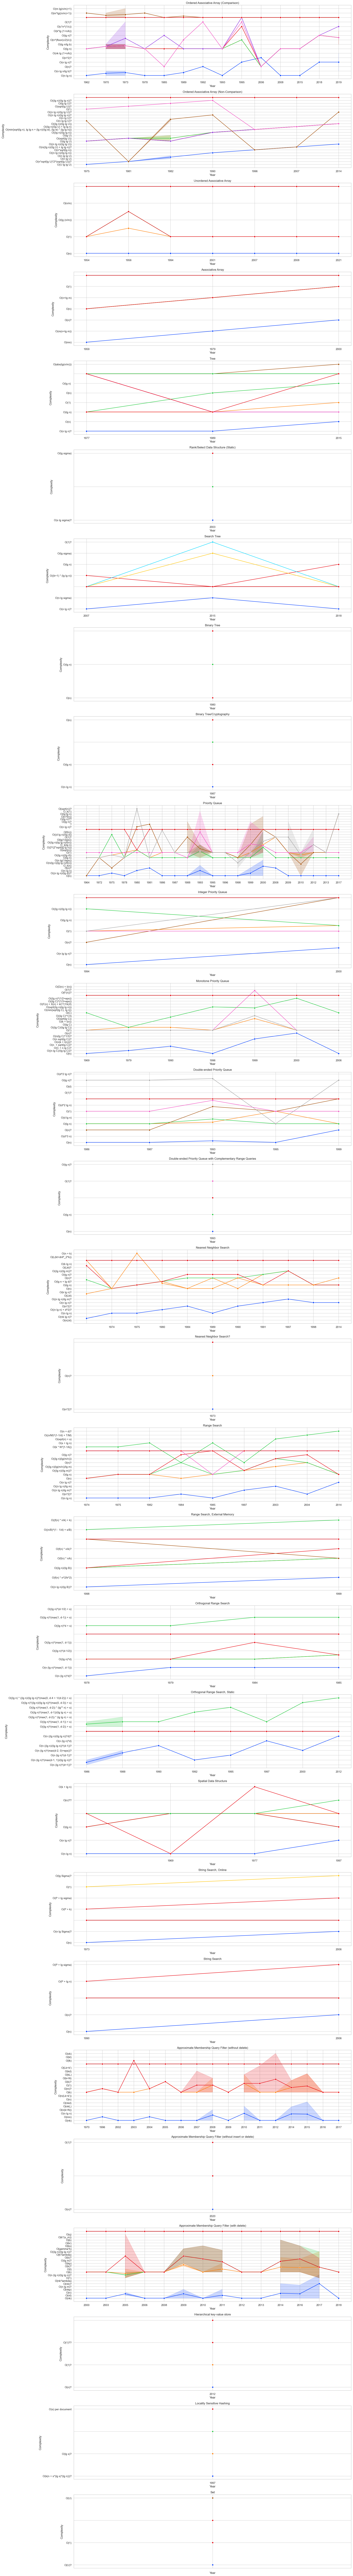

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to a bright one
sns.set(style="whitegrid", palette="bright")

# Get the list of operations and domains
operations = [col for col in df.columns if '(Time)' in col]
domains = df['Domain'].unique()

# Create a figure with as many subplots as there are domains
fig, axes = plt.subplots(nrows=len(domains), figsize=(20, len(domains)*5))

# Loop over each domain
for ax, domain in zip(axes, domains):
    # Filter the dataframe for the current domain
    df_domain = df[df['Domain'] == domain]

    # Sort the dataframe by 'Year'
    df_domain = df_domain.sort_values('Year')
    
    # Loop over each operation
    for operation in operations:
        # Check if the operation has any non-null values in the current domain
        if df_domain[operation].notna().any():
            # Create a line plot for the current operation
            sns.lineplot(x='Year', y=operation, data=df_domain, ax=ax, marker='o', sort=False)
    
    # Set the title of the subplot to the domain name
    ax.set_title(domain)
    ax.set_ylabel('Complexity')
    ax.set_xlabel('Year')
    
    # Invert the y-axis to have the fastest complexities at the bottom
    ax.invert_yaxis()

# Improve layout
plt.tight_layout()

plt.show()

In [7]:
# Plotly Plots

# import plotly.express as px
# import plotly.graph_objects as go

# # Create a list to store all the figures
# figures = []

# # Loop over each domain
# for domain in domains:
#     # Filter the dataframe for the current domain
#     df_domain = df_filtered[df_filtered['Domain'] == domain]
    
#     # Create a new figure
#     fig = go.Figure()
    
#     # Loop over each operation
#     for operation in operations:
#         # Check if the operation has any non-null values in the current domain
#         if df_domain[operation].notna().any():
#             # Add a line plot for the current operation
#             fig.add_trace(go.Scatter(x=df_domain['Year'], y=df_domain[operation], mode='lines+markers', name=operation))
    
#     # Set the title of the plot to the domain name
#     fig.update_layout(title=domain, xaxis_title='Year', yaxis_title='Complexity')
    
#     # Invert the y-axis to have the fastest complexities at the bottom
#     fig.update_yaxes(autorange="reversed")
    
#     # Add the figure to the list of figures
#     figures.append(fig)

# # Display the figures
# figures